In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns

### Загрузите набор данных credit-screening.txt. Выполните полную предобработку данных. Необходимо уметь объяснять каждый шаг предобработки.

#### Основные данные о датасете

In [3]:
data = pd.read_csv('credit-screening.txt', sep='\s+')
print(data)

    Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0            M        59.0     Village    0.258675   23.717515   18.036528   
1            f        24.0     Village    0.025412   29.175783   26.840848   
2            F        41.0        Сity    0.639816   79.968452   24.138464   
3            M        46.0     Village    0.322908   36.717792   19.851671   
4            F        41.0     Village    0.911336   75.456025   14.483106   
..         ...         ...         ...         ...         ...         ...   
202          M        53.0        city    0.356817   41.015411    5.399424   
203          P        67.0     Village    0.586842   95.870387   32.450988   
204          M        63.0  metropolis    0.489981   56.909474   17.289042   
205          F        51.0        Сity    0.976265   45.468350   26.097208   
206          M        65.0  metropolis         NaN         NaN   17.289042   

    Attribute7 Attribute8  Attribute9 Attribute10  Attribute11 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Attribute1   207 non-null    object 
 1   Attribute2   204 non-null    float64
 2   Attribute3   203 non-null    object 
 3   Attribute4   205 non-null    float64
 4   Attribute5   203 non-null    float64
 5   Attribute6   206 non-null    float64
 6   Attribute7   205 non-null    object 
 7   Attribute8   206 non-null    object 
 8   Attribute9   3 non-null      float64
 9   Attribute10  206 non-null    object 
 10  Attribute11  207 non-null    int64  
 11  Attribute12  207 non-null    int64  
 12  Class        207 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 21.2+ KB


In [7]:
data.describe()

,Attribute2,Attribute4,Attribute5,Attribute6,Attribute9,Attribute11,Attribute12
count,204.000000,205.000000,203.000000,206.000000,3.0,207.000000,207.000000
mean,45.813725,0.524778,56.419520,19.739834,1.0,2.560386,0.990338
std,14.130448,0.282239,27.173966,10.667420,0.0,1.713730,0.098056
min,20.000000,0.002511,10.899326,-4.625769,1.0,0.000000,0.000000
25%,35.000000,0.315697,30.922190,11.615835,1.0,1.000000,1.000000
50%,45.000000,0.546552,57.144986,19.364474,1.0,3.000000,1.000000
75%,58.000000,0.759459,81.813651,28.044388,1.0,4.000000,1.000000
max,70.000000,0.996647,99.785321,48.298117,1.0,5.000000,1.000000


#### Обработка пропущенных значений

In [8]:
data.isnull().sum()

Attribute1       0
Attribute2       3
Attribute3       4
Attribute4       2
Attribute5       4
Attribute6       1
Attribute7       2
Attribute8       1
Attribute9     204
Attribute10      1
Attribute11      0
Attribute12      0
Class            0
dtype: int64

##### Заменяем пропущенные значения у числовых признаков на медиану

In [29]:
data['Attribute2'] = data['Attribute2'].fillna(data['Attribute2'].median())
data['Attribute4'] = data['Attribute4'].fillna(data['Attribute4'].median())
data['Attribute5'] = data['Attribute5'].fillna(data['Attribute5'].median())

In [27]:
data.isnull().sum()

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Class          0
dtype: int64

##### Заменяем пропущенные значения у текстовых и бинарных признаков на моду

In [30]:
data['Attribute3'] = data['Attribute3'].fillna(data['Attribute3'].mode()[0])
data['Attribute6'] = data['Attribute6'].fillna(data['Attribute6'].mode()[0])
data['Attribute7'] = data['Attribute7'].fillna(data['Attribute7'].mode()[0])
data['Attribute8'] = data['Attribute8'].fillna(data['Attribute8'].mode()[0])
data['Attribute9'] = data['Attribute9'].fillna(data['Attribute9'].mode()[0])
data['Attribute10'] = data['Attribute10'].fillna(data['Attribute10'].mode()[0])

In [31]:
data.isnull().sum()

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Class          0
dtype: int64

#### Обработка выбросов

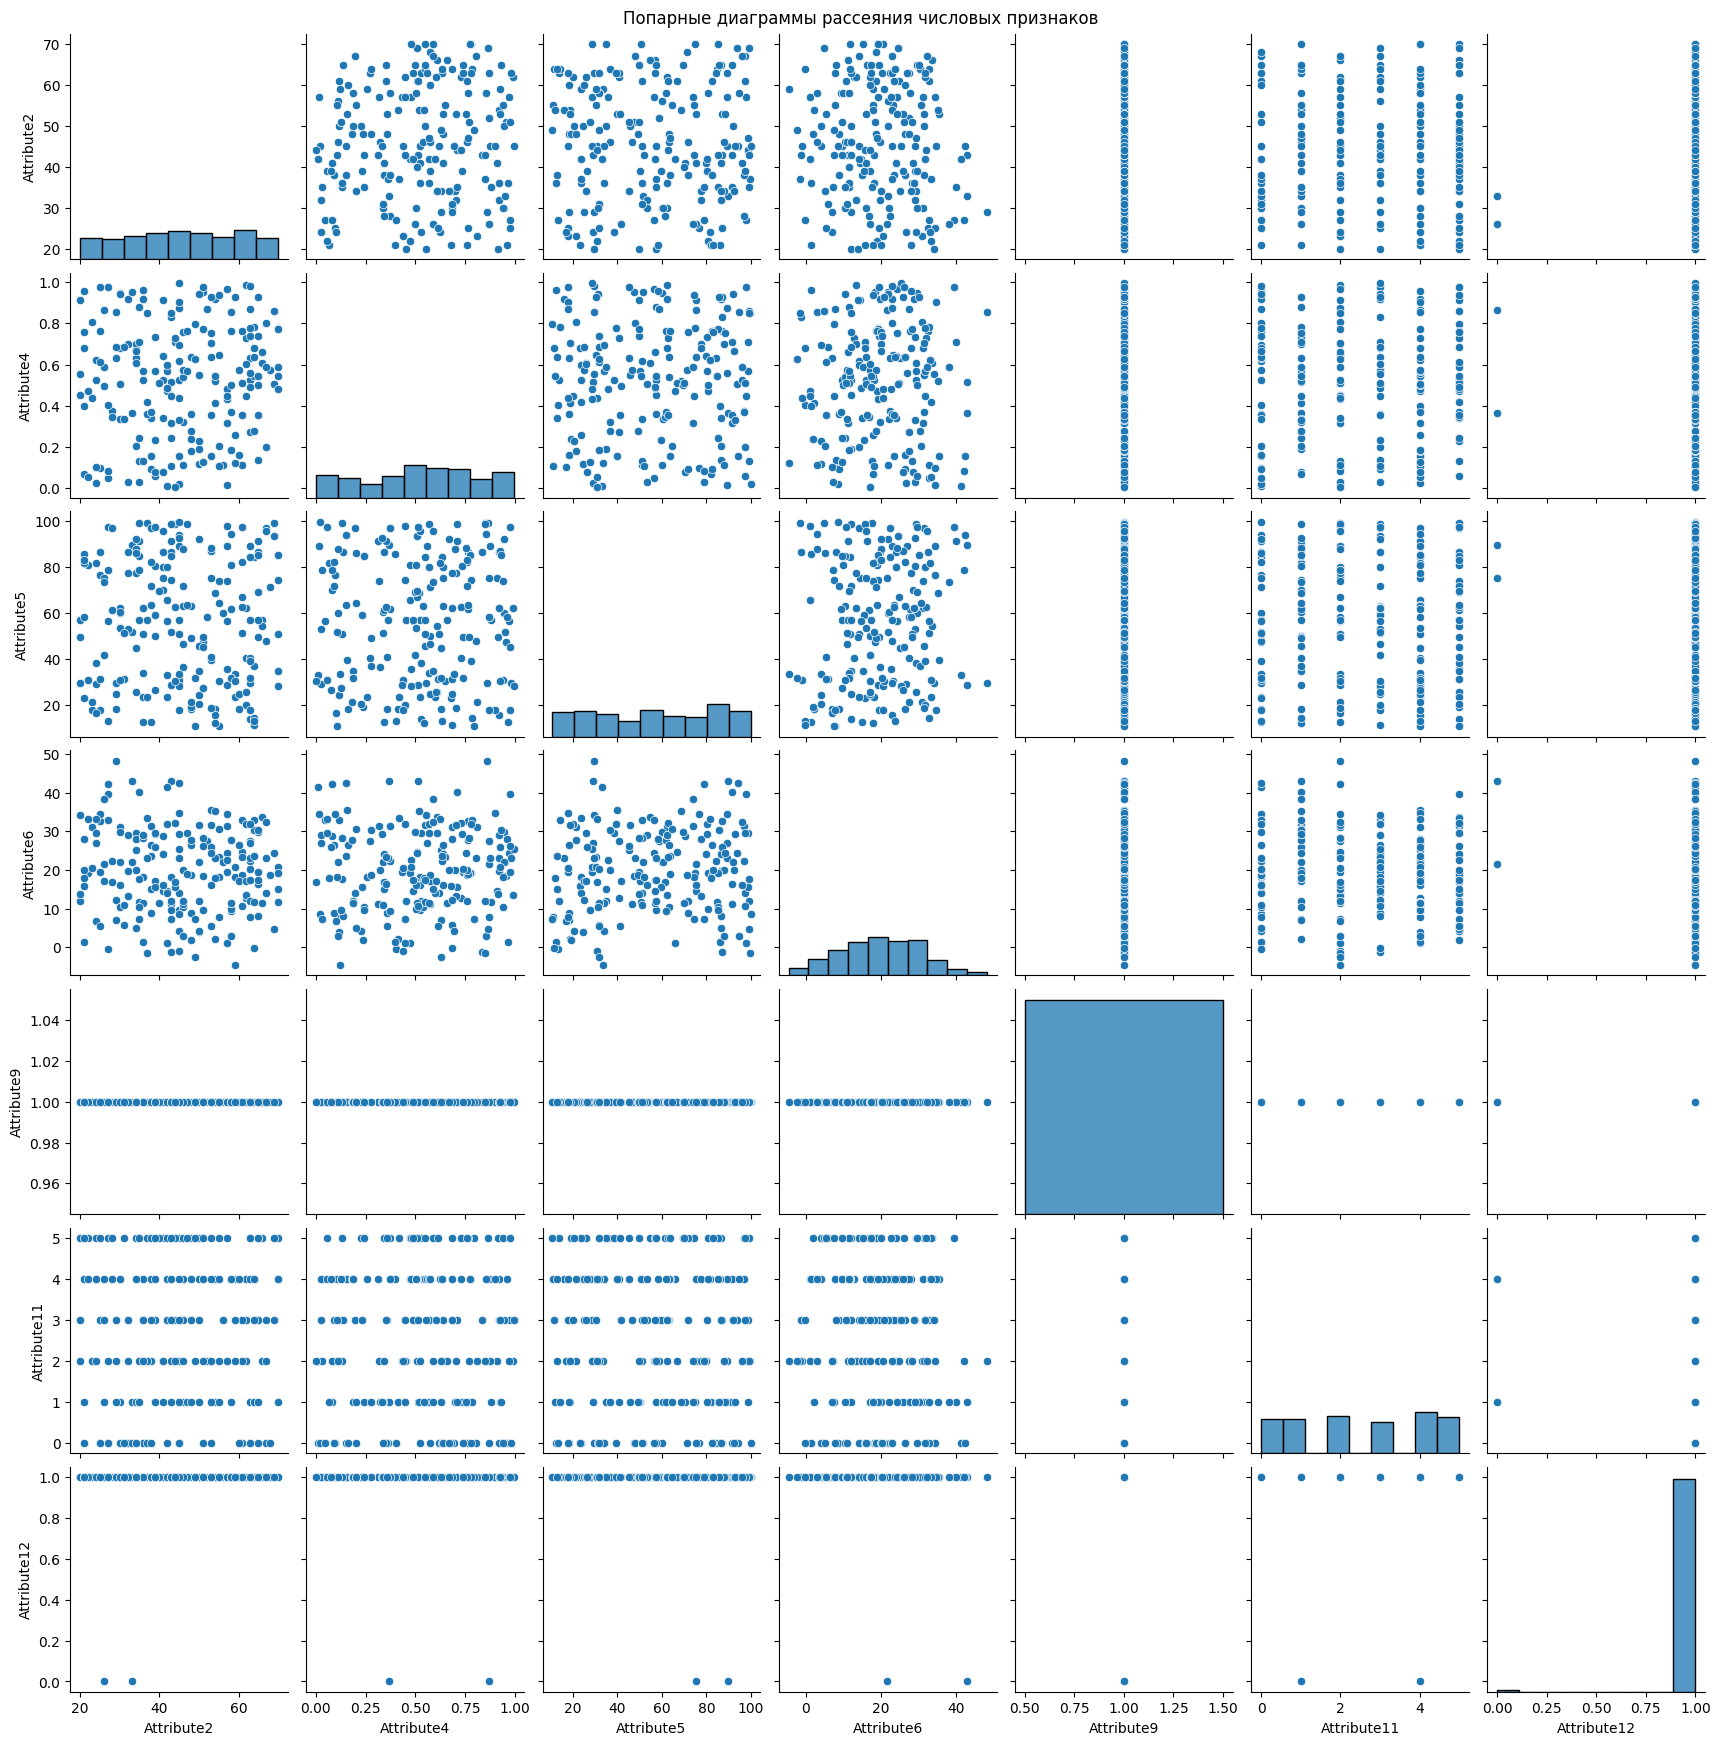

In [34]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(data[numeric_cols])
plt.suptitle("Попарные диаграммы рассеяния числовых признаков", y=1)
plt.show()

Используем межквартильный размах

In [38]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

data = remove_outliers_iqr(data, 'Attribute2')
data = remove_outliers_iqr(data, 'Attribute4')
data = remove_outliers_iqr(data, 'Attribute5')
data = remove_outliers_iqr(data, 'Attribute6')
data = remove_outliers_iqr(data, 'Attribute9')
data = remove_outliers_iqr(data, 'Attribute12')

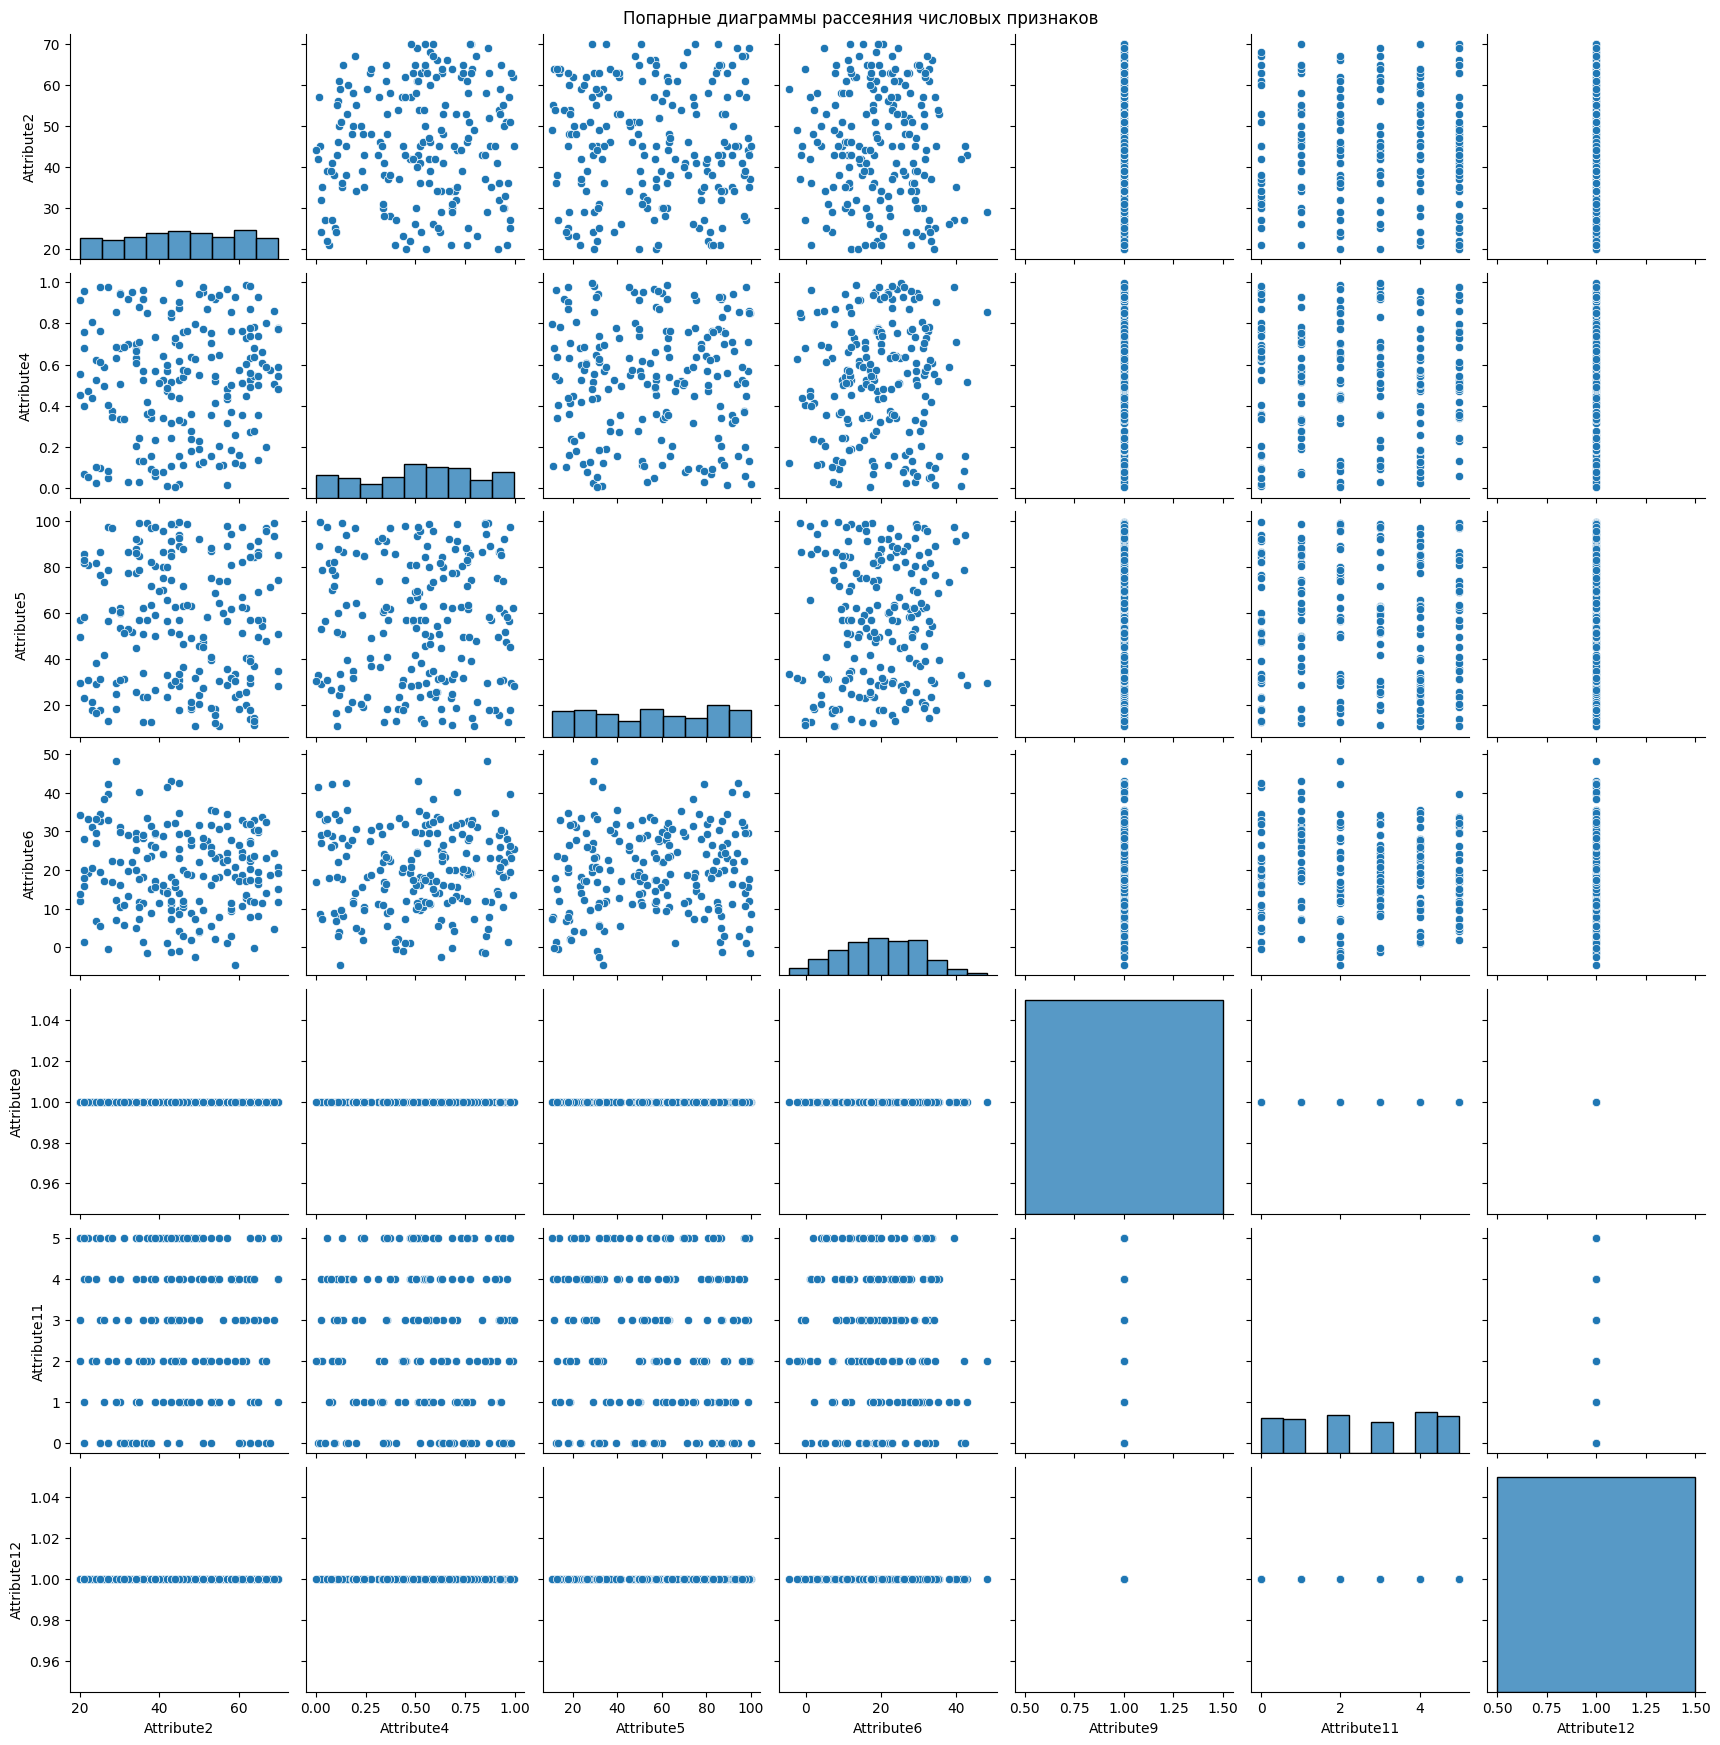

In [39]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(data[numeric_cols])
plt.suptitle("Попарные диаграммы рассеяния числовых признаков", y=1)
plt.show()